<a href="https://colab.research.google.com/github/Jahan08/RDKit-application/blob/main/Scaffoled_splitting_datamol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pandas datamol rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.4/325.4 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import datamol as dm
from rdkit import Chem

In [ ]:
url = "https://raw.githubusercontent.com/PatWalters/yamc/main/data/Carbonic.smi"
df = pd.read_csv(url,sep=" ",names=["SMILES","Name","pIC50"])
df

,SMILES,Name,pIC50
0,CC(C)CN(C)Cc1cc(ccc1O)C(=O)c2cc(sc2)S(=O)(=O)N,CHEMBL544127,8.05
1,COc1ccc(cc1)C(=O)c2cc(oc2)S(=O)(=O)N,CHEMBL340519,8.70
2,CN(C)Cc1cc(ccc1O)C(=O)c2cc(sc2)S(=O)(=O)N,CHEMBL541089,8.19
3,c1cc(ccc1CN2CCOCC2)S(=O)(=O)c3cc(sc3)S(=O)(=O)N,CHEMBL555153,8.12
4,CC(C)CN(C)Cc1cc(ccc1O)S(=O)(=O)c2cc(sc2)S(=O)(...,CHEMBL539817,8.30
...,...,...,...
551,CN(C)C(=O)NC1CCc2c(cccc2OC)C1,CHEMBL3786651,7.76
552,CN(C)C(=O)NC1CCc2ccc(cc2C1)O,CHEMBL3785207,7.22
553,CN(C)S(=O)(=O)NC1CCc2c(cccc2O)C1,CHEMBL3786873,7.81
554,CN(C)S(=O)(=O)NC1CCc2cc(ccc2C1)O,CHEMBL3786442,7.89


In [ ]:
df["mol"] = df.SMILES.apply(dm.to_mol)
df["inchi_key"] = df.mol.apply(Chem.MolToInchiKey)

In [ ]:
activity_dict = {}
for mol, pIC50 in df[["mol","pIC50"]].values:
    activity_dict[mol] = {"pIC50" : pIC50}

In [ ]:
with dm.without_rdkit_log():
    scaffolds, scf2infos, scf2groups = dm.scaffold.fuzzy_scaffolding(df.mol.tolist())

In [ ]:
scf2infos['num_mols'] = [len(x) for x in scf2infos.mols]

In [ ]:
scaffold_idx = 1
mols = scf2infos.sort_values("num_mols",ascending=False).mols.values[scaffold_idx]
inchi_keys = [Chem.MolToInchiKey(x) for x in mols]
scaffold_df = df.query("inchi_key in @inchi_keys").copy()
scaffold_df

,SMILES,Name,pIC50,mol,inchi_key
45,c1cc(c(cc1S(=O)(=O)N)F)SCCCCO,CHEMBL104754,8.820,<rdkit.Chem.rdchem.Mol object at 0x7f3502cc33e0>,VCSKMHJYQZYTKJ-UHFFFAOYSA-N
54,c1c(cc(c(c1S(=O)(=O)N)Cl)Cl)S(=O)(=O)N,CHEMBL17,7.408,<rdkit.Chem.rdchem.Mol object at 0x7f3502cc37d0>,GJQPMPFPNINLKP-UHFFFAOYSA-N
105,c1cc(c(cc1S(=O)(=O)N)N)S(=O)(=O)CCCO,CHEMBL105691,7.640,<rdkit.Chem.rdchem.Mol object at 0x7f3502b25a10>,OZADORIEZWGIIQ-UHFFFAOYSA-N
108,c1cc(c(cc1S(=O)(=O)N)F)S(=O)(=O)CCO,CHEMBL104929,8.300,<rdkit.Chem.rdchem.Mol object at 0x7f3502b25b60>,IAWYFQRAIGYURV-UHFFFAOYSA-N
111,COC(=O)c1cc(ccc1S(=O)(=O)CCO)S(=O)(=O)N,CHEMBL104961,7.520,<rdkit.Chem.rdchem.Mol object at 0x7f3502b25cb0>,FCPZETADVJQVHV-UHFFFAOYSA-N
...,...,...,...,...,...
509,c1cc(ccc1[N+](=O)[O-])S(=O)(=O)NC(P(=O)(O)O)P(...,CHEMBL3291007,5.740,<rdkit.Chem.rdchem.Mol object at 0x7f3502b50c80>,YWLUKEMIKYQFFX-UHFFFAOYSA-N
510,c1cc(cc(c1)S(=O)(=O)NC(P(=O)(O)O)P(=O)(O)O)[N+...,CHEMBL3291008,5.420,<rdkit.Chem.rdchem.Mol object at 0x7f3502b50cf0>,NYHZYLUEWGHESJ-UHFFFAOYSA-N
524,Cc1ccc(cc1)S(=O)(=O)NCCCN(C)C,CHEMBL1621411,5.180,<rdkit.Chem.rdchem.Mol object at 0x7f3502b51310>,MFLRGXNDNKRSKU-UHFFFAOYSA-N
525,Cc1ccc(cc1)S(=O)(=O)NCC(=O)O,CHEMBL287486,5.440,<rdkit.Chem.rdchem.Mol object at 0x7f3502b51380>,VDKFCCZUCXYILI-UHFFFAOYSA-N


In [ ]:
scaffold_df = scaffold_df.sample(20)
scaffold_df.sort_values("pIC50",inplace=True)

In [ ]:
center_mol = scaffold_df.mol.values[-1]
ring_mols = scaffold_df.mol.values[0:-1][:19]

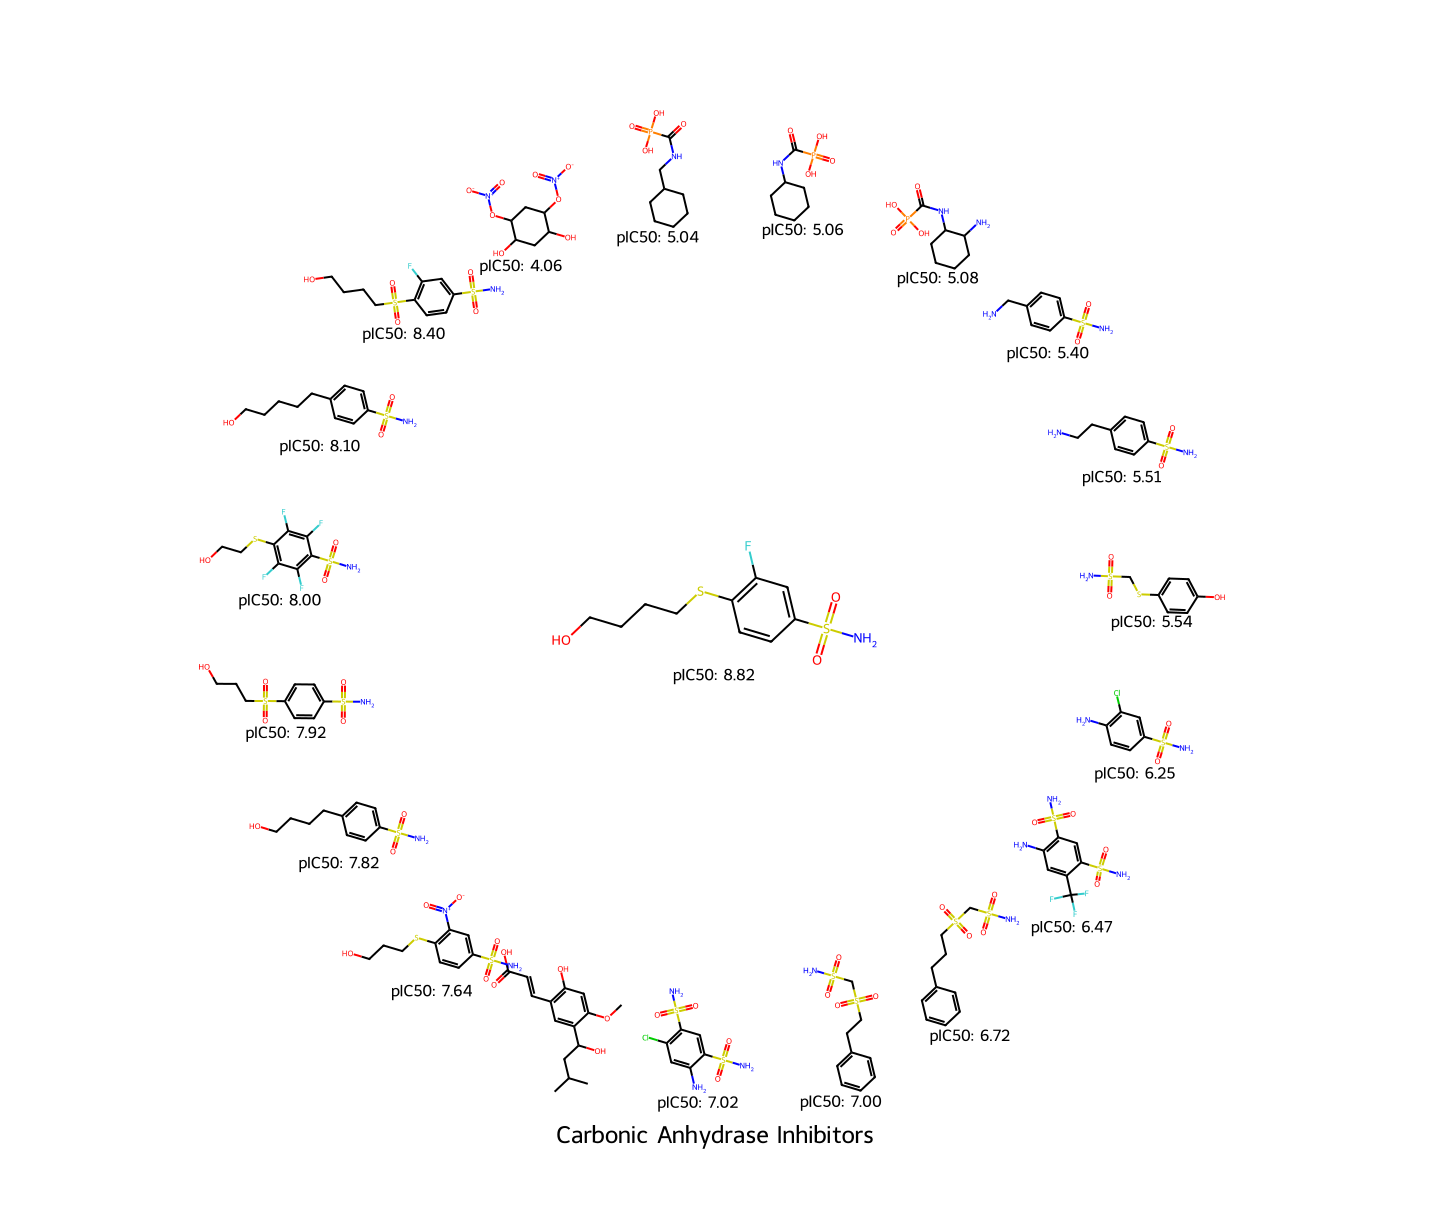

In [ ]:
out = dm.viz.circle_grid(center_mol,
                        ring_mols,
                        act_mapper=activity_dict,
                        legend="Carbonic Anhydrase Inhibitors",
                        ring_color=None,
                        margin=180,
                        ring_scaler=0.6,
                        align=None,
                        legendFontSize=16)
out